In [1]:
# Install required libraries
!pip install langdetect
!pip install polyglot
!pip install textblob
!pip install datasets
!pip install scikit-learn pandas numpy matplotlib seaborn

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import string
from collections import Counter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=2f9b443996ef5574a8da73eef2cde8765a4c9bcd6079090298961e0561ec148f
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52563 sha256=c54cec78611167dfee5beb36f79cf6c3cad1ba3472e11ecc23a7a489d317e33f
  Stored in directory: /root/.cache/pip/wheels/70/e3/da/d2f524831513cedfe2a49e46a94028bf6f632f6ba172d6dead
Successfully built polyglot


In [2]:
# Create a sample multilingual dataset
data = {
    'text': [
        'Hello, how are you today?',
        'Bonjour, comment allez-vous?',
        'Hola, ¿cómo estás?',
        'Guten Tag, wie geht es Ihnen?',
        'Ciao, come stai?',
        'Olá, como você está?',
        'Привет, как дела?',
        'こんにちは、元気ですか？',
        'नमस्ते, आप कैसे हैं?',
        'مرحبا، كيف حالك؟'
    ],
    'language': [
        'English', 'French', 'Spanish', 'German', 'Italian',
        'Portuguese', 'Russian', 'Japanese', 'Hindi', 'Arabic'
    ]
}

df = pd.DataFrame(data)
print(df.head())

                            text language
0      Hello, how are you today?  English
1   Bonjour, comment allez-vous?   French
2             Hola, ¿cómo estás?  Spanish
3  Guten Tag, wie geht es Ihnen?   German
4               Ciao, come stai?  Italian


In [3]:
def preprocess_text(text):
    """
    Clean and preprocess text data
    """
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits (optional for language detection)
    # text = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', text)

    # Remove extra whitespaces
    text = ' '.join(text.split())

    return text

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)
print("Preprocessing completed!")

Preprocessing completed!


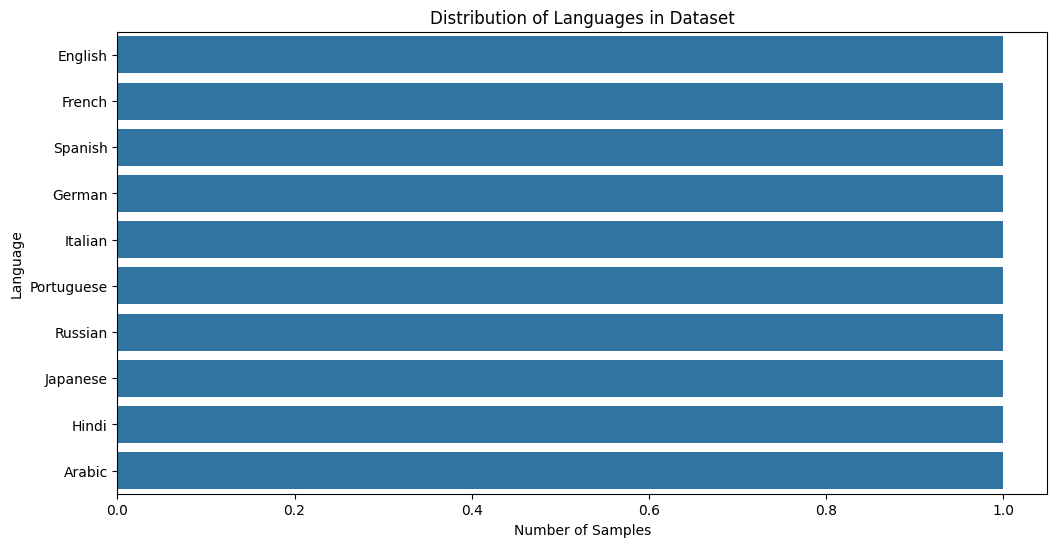

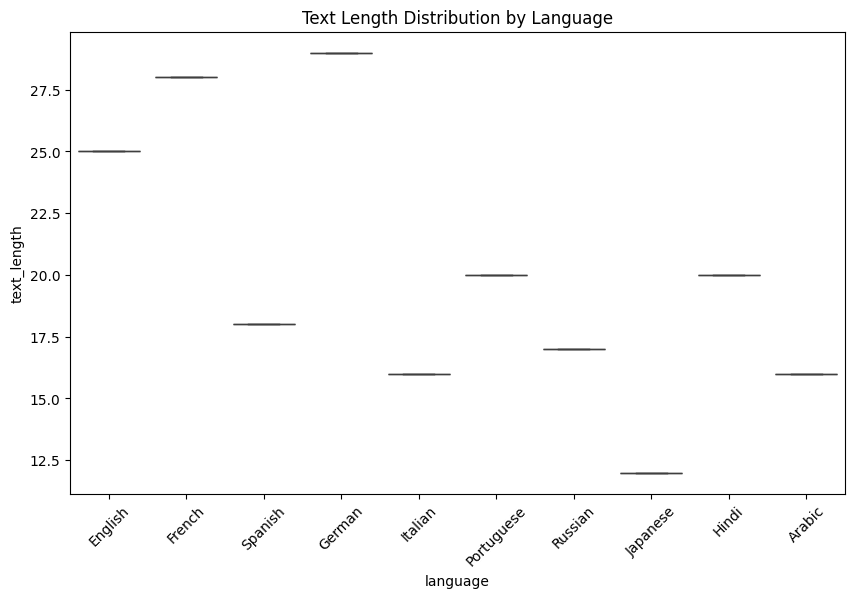

In [4]:
# Visualize language distribution
plt.figure(figsize=(12, 6))
language_counts = df['language'].value_counts()
sns.barplot(x=language_counts.values, y=language_counts.index)
plt.title('Distribution of Languages in Dataset')
plt.xlabel('Number of Samples')
plt.ylabel('Language')
plt.show()

# Text length analysis
df['text_length'] = df['cleaned_text'].str.len()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='language', y='text_length')
plt.xticks(rotation=45)
plt.title('Text Length Distribution by Language')
plt.show()

In [5]:
# Character-level n-grams (effective for language detection)
def extract_char_ngrams(text, n=3):
    """Extract character n-grams from text"""
    ngrams = []
    for i in range(len(text) - n + 1):
        ngrams.append(text[i:i+n])
    return ' '.join(ngrams)

# Apply character n-gram extraction
df['char_ngrams'] = df['cleaned_text'].apply(lambda x: extract_char_ngrams(x, 3))

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    analyzer='char',
    ngram_range=(2, 4),  # Character bi-grams to 4-grams
    max_features=10000,
    lowercase=True
)

# Fit and transform the text data
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['language']

print(f"Feature matrix shape: {X.shape}")
print(f"Number of unique languages: {len(y.unique())}")

Feature matrix shape: (10, 486)
Number of unique languages: 10


In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize multiple models for comparison
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"{name} Accuracy: {accuracy:.4f}")


Training Naive Bayes...
Naive Bayes Accuracy: 0.0000

Training SVM...
SVM Accuracy: 0.0000

Training Logistic Regression...
Logistic Regression Accuracy: 0.0000


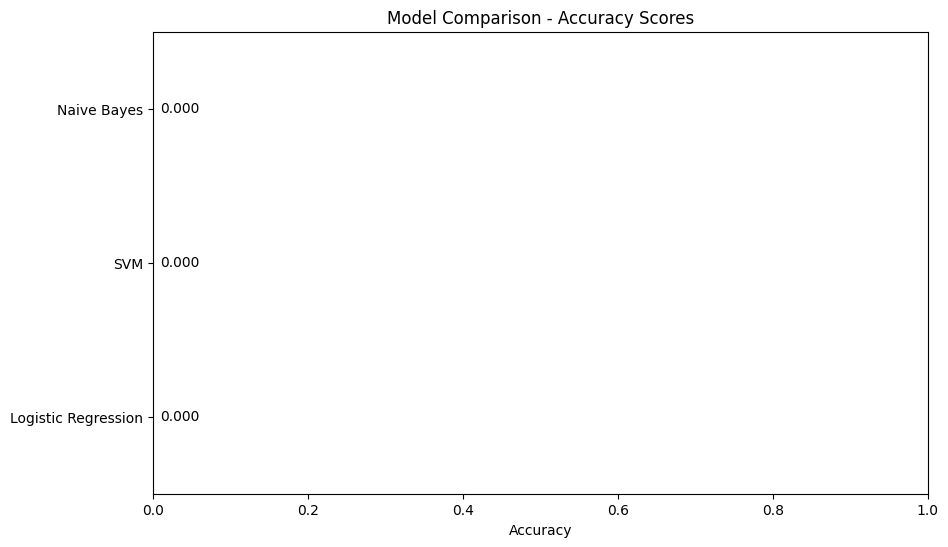


Detailed evaluation for Naive Bayes:

Classification Report:
              precision    recall  f1-score   support

      French       0.00      0.00      0.00       1.0
       Hindi       0.00      0.00      0.00       1.0
     Italian       0.00      0.00      0.00       0.0
    Japanese       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

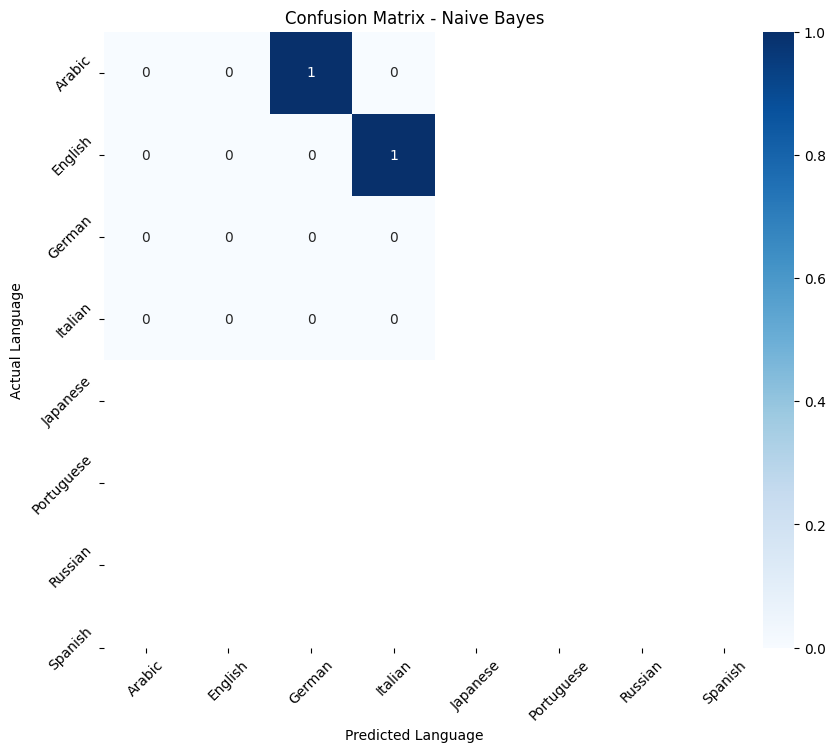

In [10]:
# Compare model performance
plt.figure(figsize=(10, 6))
models_names = list(results.keys())
accuracies = list(results.values())

sns.barplot(x=accuracies, y=models_names)
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Accuracy')
plt.xlim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, f'{v:.3f}', va='center')
plt.show()

# Detailed evaluation for best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\nDetailed evaluation for {best_model_name}:")
y_pred_best = best_model.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_,
            yticklabels=best_model.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual Language')
plt.xlabel('Predicted Language')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [18]:
def predict_language(text, model=best_model, vectorizer=vectorizer):
    """
    Predict the language of input text
    """
    # Preprocess the text
    cleaned_text = preprocess_text(text)

    # Transform using the fitted vectorizer
    text_vector = vectorizer.transform([cleaned_text])

    # Make prediction
    prediction = model.predict(text_vector)[0]

    # Get prediction probability
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(text_vector)[0]
        confidence = max(probabilities)

        return {
            'language': prediction,
            'confidence': confidence,
            'all_probabilities': dict(zip(model.classes_, probabilities))
        }
    else:
        return {'language': prediction}

# Test the function
test_texts = [
    "Buenos días, ¿cómo está usted?",
    "Good morning, how are you?",
    "Bonjour, comment ça va?",
    "Guten Morgen, wie geht es dir?"
]

print("Testing Language Detection:")
print("-" * 50)
for text in test_texts:
    result = predict_language(text)
    print(f"Text: '{text}'")
    print(f"Predicted Language: {result['language']}")
    if 'confidence' in result:
        print(f"Confidence: {result['confidence']:.3f}")
    print("-" * 30)

Testing Language Detection:
--------------------------------------------------
Text: 'Buenos días, ¿cómo está usted?'
Predicted Language: Spanish
Confidence: 0.209
------------------------------
Text: 'Good morning, how are you?'
Predicted Language: English
Confidence: 0.206
------------------------------
Text: 'Bonjour, comment ça va?'
Predicted Language: Italian
Confidence: 0.138
------------------------------
Text: 'Guten Morgen, wie geht es dir?'
Predicted Language: German
Confidence: 0.218
------------------------------


In [20]:
def interactive_language_detector():
    """
    Interactive function to test language detection
    """
    print("Language Detection System")
    print("Enter 'quit' to exit")
    print("-" * 40)

    while True:
        user_input = input("\nEnter text to detect language: ")

        if user_input.lower() == 'quit':
            break

        if user_input.strip():
            result = predict_language(user_input)
            print(f"Detected Language: {result['language']}")

            if 'confidence' in result:
                print(f"Confidence: {result['confidence']:.3f}")

                # Show top 3 predictions
                sorted_probs = sorted(result['all_probabilities'].items(),
                                    key=lambda x: x[1], reverse=True)[:3]
                print("Top 3 predictions:")
                for lang, prob in sorted_probs:
                    print(f"  {lang}: {prob:.3f}")

# Run interactive detector
interactive_language_detector()  # Uncomment to run

Language Detection System
Enter 'quit' to exit
----------------------------------------

Enter text to detect language: Hello, how are you today?
Detected Language: English
Confidence: 0.262
Top 3 predictions:
  English: 0.262
  Italian: 0.110
  Japanese: 0.107

Enter text to detect language: Bonjour, comment allez-vous ?
Detected Language: Italian
Confidence: 0.135
Top 3 predictions:
  Italian: 0.135
  Portuguese: 0.131
  Japanese: 0.124

Enter text to detect language: Hola, ¿cómo estás?
Detected Language: Spanish
Confidence: 0.259
Top 3 predictions:
  Spanish: 0.259
  Portuguese: 0.123
  Italian: 0.105

Enter text to detect language: Guten Tag, wie geht es Ihnen?
Detected Language: German
Confidence: 0.259
Top 3 predictions:
  German: 0.259
  Italian: 0.108
  Spanish: 0.107

Enter text to detect language: Ciao, come stai?
Detected Language: Italian
Confidence: 0.261
Top 3 predictions:
  Italian: 0.261
  Portuguese: 0.115
  English: 0.105

Enter text to detect language: Olá! Bom dia.


Advanced features added!


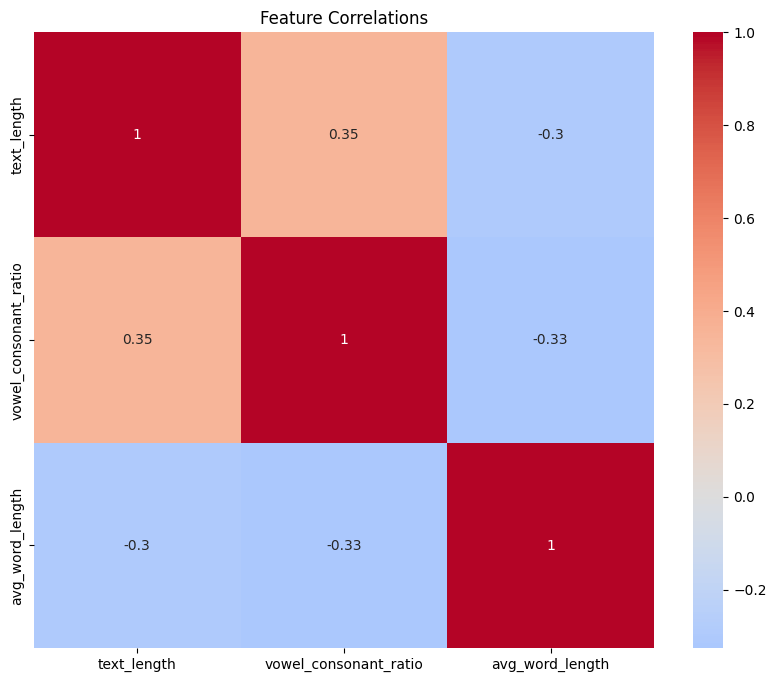

In [14]:
# Advanced feature extraction
def advanced_features(df):
    """
    Extract advanced features for better language detection
    """
    # Vowel-consonant ratio
    def vowel_consonant_ratio(text):
        vowels = 'aeiouáéíóúàèìòùâêîôûäëïöü'
        consonants = 'bcdfghjklmnpqrstvwxyzçñ'
        vowel_count = sum(1 for char in text.lower() if char in vowels)
        consonant_count = sum(1 for char in text.lower() if char in consonants)
        return vowel_count / (consonant_count + 1)

    # Average word length
    def avg_word_length(text):
        words = text.split()
        if not words:
            return 0
        return sum(len(word) for word in words) / len(words)

    # Character frequency analysis
    def char_frequency(text):
        chars = ''.join(text.split())
        total_chars = len(chars)
        if total_chars == 0:
            return {}
        char_freq = Counter(chars.lower())
        return {char: freq/total_chars for char, freq in char_freq.items()}

    df['vowel_consonant_ratio'] = df['cleaned_text'].apply(vowel_consonant_ratio)
    df['avg_word_length'] = df['cleaned_text'].apply(avg_word_length)

    return df

# Apply advanced features
df_advanced = advanced_features(df.copy())
print("Advanced features added!")

# Display feature correlations
numeric_features = ['text_length', 'vowel_consonant_ratio', 'avg_word_length']
if len(df_advanced) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df_advanced[numeric_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlations')
    plt.show()

In [15]:
# Save the trained model and vectorizer
import pickle

# Save the best model
with open('language_detector_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the vectorizer
with open('language_detector_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Model and vectorizer saved successfully!")

# Create a simple deployment function
def load_and_predict(text, model_path='language_detector_model.pkl',
                    vectorizer_path='language_detector_vectorizer.pkl'):
    """
    Load saved model and make predictions
    """
    with open(model_path, 'rb') as f:
        model = pickle.load(f)

    with open(vectorizer_path, 'rb') as f:
        vectorizer = pickle.load(f)

    # Preprocess and predict
    cleaned_text = preprocess_text(text)
    text_vector = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_vector)[0]

    return prediction

# Test the deployment function
test_text = "Hola, ¿cómo estás hoy?"
predicted_lang = load_and_predict(test_text)
print(f"Text: '{test_text}' -> Language: {predicted_lang}")

Model and vectorizer saved successfully!
Text: 'Hola, ¿cómo estás hoy?' -> Language: Spanish
